In [ ]:
'''Tratar dados 'tempo.csv'
Aparência: sol, nublado, chuva - OK
Temperatura: -135 ~ 130 F - OK
Umidade: 0 ~ 100 - OK
Jogar: sim/nao - OK
Tratar valores NAs - OK'''

In [2]:
#Importação de libs:
import pandas as pd
import seaborn as sbn
import statistics as sts

In [66]:
#Importação de dados:
datasetTempo = pd.read_csv('tempo.csv', sep=';')

#Visualização:
datasetTempo

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,menos,64,65.0,VERDADEIRO,sim
7,sol,1220,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
9,chuva,75,200.0,NaN,sim


In [44]:
#Tamanho do dataset: 999 linhas VS 12 colunas.
datasetTempo.shape

(14, 5)

**TRATAMENTO DE DADOS: Aparência: sol, nublado, chuva**

In [10]:
#Exploração de dados categóricos: Aparencia (Deve ter apenas sol, nublado, e chuva).
agrupamentoAparencia = datasetTempo.groupby(['Aparencia']).size()
agrupamentoAparencia

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [45]:
#Atribuímos sol (moda):
datasetTempo.loc[datasetTempo['Aparencia'] == 'menos', 'Aparencia'] = 'sol'
agrupandoTempo = datasetTempo.groupby(['Aparencia']).size()

**TRATAMENTO DE DADOS: Temperatura: -135 ~ 130 F**

In [61]:
#A listagem de temperatura devem estar entre -135 à 130 F (fahrenheit).
#Checamos se algum campo é inferior e superior à estes critérios (domínio):
datasetTempo.loc[(datasetTempo['Temperatura'] < -135) | (datasetTempo['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [70]:
#Realizar a mediana:
medianaTemp = sts.median(datasetTempo['Temperatura'])
medianaTemp

72.375

In [71]:
#Substituir o que está fora de domínio pela mediana:
datasetTempo.loc[(datasetTempo['Temperatura'] < -135) | (datasetTempo['Temperatura'] > 130), 'Temperatura'] = medianaTemp

In [72]:
#Checar se ainda há valores fora de domínio:
datasetTempo.loc[(datasetTempo['Temperatura'] < -135) | (datasetTempo['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


Text(0.5, 1.0, 'Temperatura')

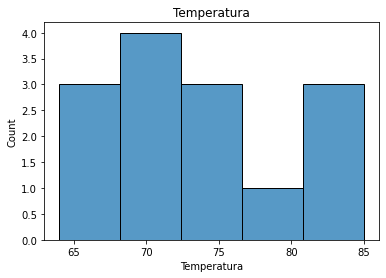

In [88]:
sbn.histplot(datasetTempo['Temperatura']).set_title('Temperatura')

C:\Users\brend\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Temperatura')

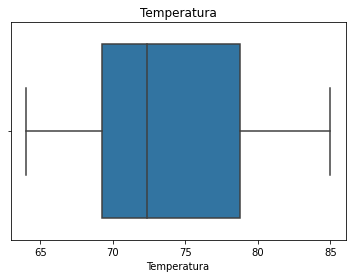

In [93]:
sbn.boxplot(datasetTempo['Temperatura']).set_title('Temperatura')

In [73]:
datasetTempo

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.00,85.0,FALSO,nao
1,sol,80.00,90.0,VERDADEIRO,nao
2,nublado,83.00,86.0,FALSO,sim
3,chuva,70.00,NaN,FALSO,sim
4,chuva,68.00,80.0,FALSO,sim
5,chuva,65.00,70.0,VERDADEIRO,nao
6,menos,64.00,65.0,VERDADEIRO,sim
7,sol,72.75,95.0,FALSO,nao
8,sol,69.00,70.0,FALSO,sim
9,chuva,75.00,200.0,NaN,sim


**TRATAMENTO DE DADOS: Umidade: 0 ~ 100**

In [74]:
#Checar se há valores fora de domínio (0 ~ 100):
datasetTempo.loc[(datasetTempo['Umidade'] <= 0) | (datasetTempo['Umidade'] >= 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,NaN,sim


In [75]:
#Realizar a mediana:
medianaUmidade = sts.median(datasetTempo['Umidade'])
medianaUmidade

85.5

In [76]:
#Mudança de valores fora de domínio pela mediana:
datasetTempo.loc[(datasetTempo['Umidade'] <= 0) | (datasetTempo['Umidade'] >= 100), 'Umidade'] = medianaUmidade

In [77]:
#Checar se há AINDA valores fora de domínio (0 ~ 100):
datasetTempo.loc[(datasetTempo['Umidade'] <= 0) | (datasetTempo['Umidade'] >= 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


C:\Users\brend\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Umidade')

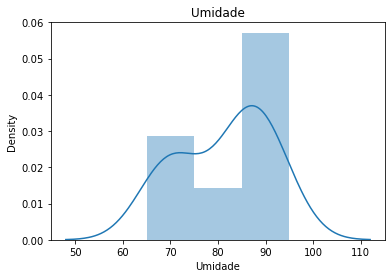

In [90]:
sbn.distplot(datasetTempo['Umidade']).set_title('Umidade')

C:\Users\brend\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Umidade')

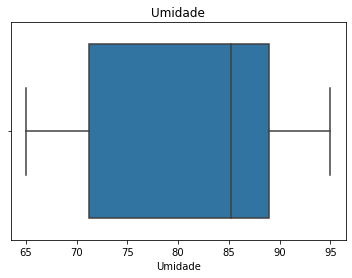

In [92]:
sbn.boxplot(datasetTempo['Umidade']).set_title('Umidade')

**TRATAMENTO DE DADOS: Jogar: sim/nao**

In [78]:
datasetTempo

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.00,85.0,FALSO,nao
1,sol,80.00,90.0,VERDADEIRO,nao
2,nublado,83.00,86.0,FALSO,sim
3,chuva,70.00,NaN,FALSO,sim
4,chuva,68.00,80.0,FALSO,sim
5,chuva,65.00,70.0,VERDADEIRO,nao
6,menos,64.00,65.0,VERDADEIRO,sim
7,sol,72.75,95.0,FALSO,nao
8,sol,69.00,70.0,FALSO,sim
9,chuva,75.00,85.5,NaN,sim


**TRATAMENTO DE DADOS: Tratar valores NAs**

In [79]:
datasetTempo['Vento'].isnull().sum()

1

In [81]:
agrupamentoVento = datasetTempo.groupby(['Vento']).size()
agrupamentoVento

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [82]:
#Substituir valores nulos/NANs pela moda:
datasetTempo['Vento'].fillna('FALSO', inplace=True)

In [83]:
datasetTempo['Vento'].isnull().sum()

0

In [85]:
datasetTempo['Umidade'].fillna(medianaUmidade, inplace=True)

In [86]:
datasetTempo

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.00,85.0,FALSO,nao
1,sol,80.00,90.0,VERDADEIRO,nao
2,nublado,83.00,86.0,FALSO,sim
3,chuva,70.00,85.5,FALSO,sim
4,chuva,68.00,80.0,FALSO,sim
5,chuva,65.00,70.0,VERDADEIRO,nao
6,menos,64.00,65.0,VERDADEIRO,sim
7,sol,72.75,95.0,FALSO,nao
8,sol,69.00,70.0,FALSO,sim
9,chuva,75.00,85.5,FALSO,sim
